In [ ]:
# [Nur Colab] Diese Zellen müssen nur auf *Google Colab* ausgeführt werden und installieren Packete und Daten
!wget -q https://raw.githubusercontent.com/KI-Campus/AMALEA/master/requirements.txt && pip install --quiet -r requirements.txt
!wget --quiet "https://github.com/KI-Campus/AMALEA/releases/download/data/data.zip" && unzip -q data.zip

# Inhaltsstoffe: Kann Spuren von Intelligenz enthalten

## Faltungsoperation

Wie der Name schon sagt, macht die Faltungsschicht (engl. convolutional layer) Gebrauch von Faltungen. Als kurze Zusammenfassung fasst dieses kleine Widget die Faltung von zwei rechteckigen Funktionen zusammen. Die Faltungsoperation ist durch die folgende Gleichung im kontinuierlichen Bereich gegeben:

\begin{equation*}
x(t) \ast y(t) = \langle x(t - \tau), y^{\ast}(\tau) \rangle_{\tau} = \int_{-\infty}^{+\infty} x(t -\tau) y(\tau) d \tau
\end{equation*}

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal
figure_inches = 10


In [ ]:
def convolution(tau:tuple, width1:tuple, width2:tuple):

    x1 = np.linspace(-3.5, 3.5, num = 1000)
    dX = x1[1] - x1[0]
    rect1 = np.where(abs(x1) <= width1/2 , 1, 0)
    rect2 = np.where(abs(x1- tau)<= width2/2 , 1, 0)

    # Convolution of rect1 and rect2
    conv = np.convolve(rect1, rect2, 'same') * dX


    # Plotting
    plt.figure(1, figsize=(16.5,3.5))
    plt.plot(x1, rect1, 'b', label = '$rect_{1}$(t)')
    plt.plot(x1, rect2, 'r', label = '$rect_{2}$(t- $\\tau$)')
    x_gr = x1 - tau
    if tau <=0:
        index = np.where((np.absolute(x_gr)-np.absolute(tau))<=0.004)
        index = index[0][0]
    else:
        index = np.where(np.absolute(x_gr-tau)<=0.004)
        if not index[0].size > 0:
            index = [[999]]
        index = index[0][0]
    plt.plot(x_gr[:index]  , conv[:index], 'g', label = '$rect_{1}$ $\\ast$ $rect_{2}$')
    plt.axvline(x = tau, color= 'r', dashes = [6,2])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':15})
    plt.ylim(0,np.maximum(np.max(conv),np.max(rect1))+0.1)
    plt.xlim(-2.5, 2.5)
    plt.grid()
    plt.show()

In [ ]:
# Interactive Plot
interactive_plot = interactive(convolution, tau = (-2.0, +2.0, 0.25),
                               width1 = (0.25, 1.75, 0.25),
                               width2 = (0.25, 1.75, 0.25))
output = interactive_plot.children[-1]
interactive_plot

Natürlich erfolgt die Berechnung der Faltung nicht im kontinuierlichen Bereich. Daher verwendet numpy die folgende Formel für diskrete Faltung im 1-dimensionalen Raum:

\begin{equation*}
x_n \ast y_n = \sum_{i = -\infty}^{\infty} x_i  \  y_{n-i} = \sum_{i = -\infty}^{\infty} y_{i}  \ x_{n-i}
\end{equation*}

### Filter und Faltung in der Bildverarbeitung

Die Faltungsoperation kann auch in zwei Dimensionen angegeben werden:

\begin{equation*}
x_{mn} \ast \ast \ y_{mn} = \sum_{i = -\infty}^{\infty} \sum_{j = -\infty}^{\infty} x_{ij}  \  y_{m-i, n-j} = \sum_{i = -\infty}^{\infty} \sum_{j = -\infty}^{\infty} y_{ij}  \ x_{m-i, n-j}
\end{equation*}

In Bezug auf die Faltung von Bildern im diskreten Bereich ändern sich die Grenzen zu endlichen Werten, die die Größe der Bildform entsprechen.
Diese Operation kann dann wie folgt visualisiert werden:

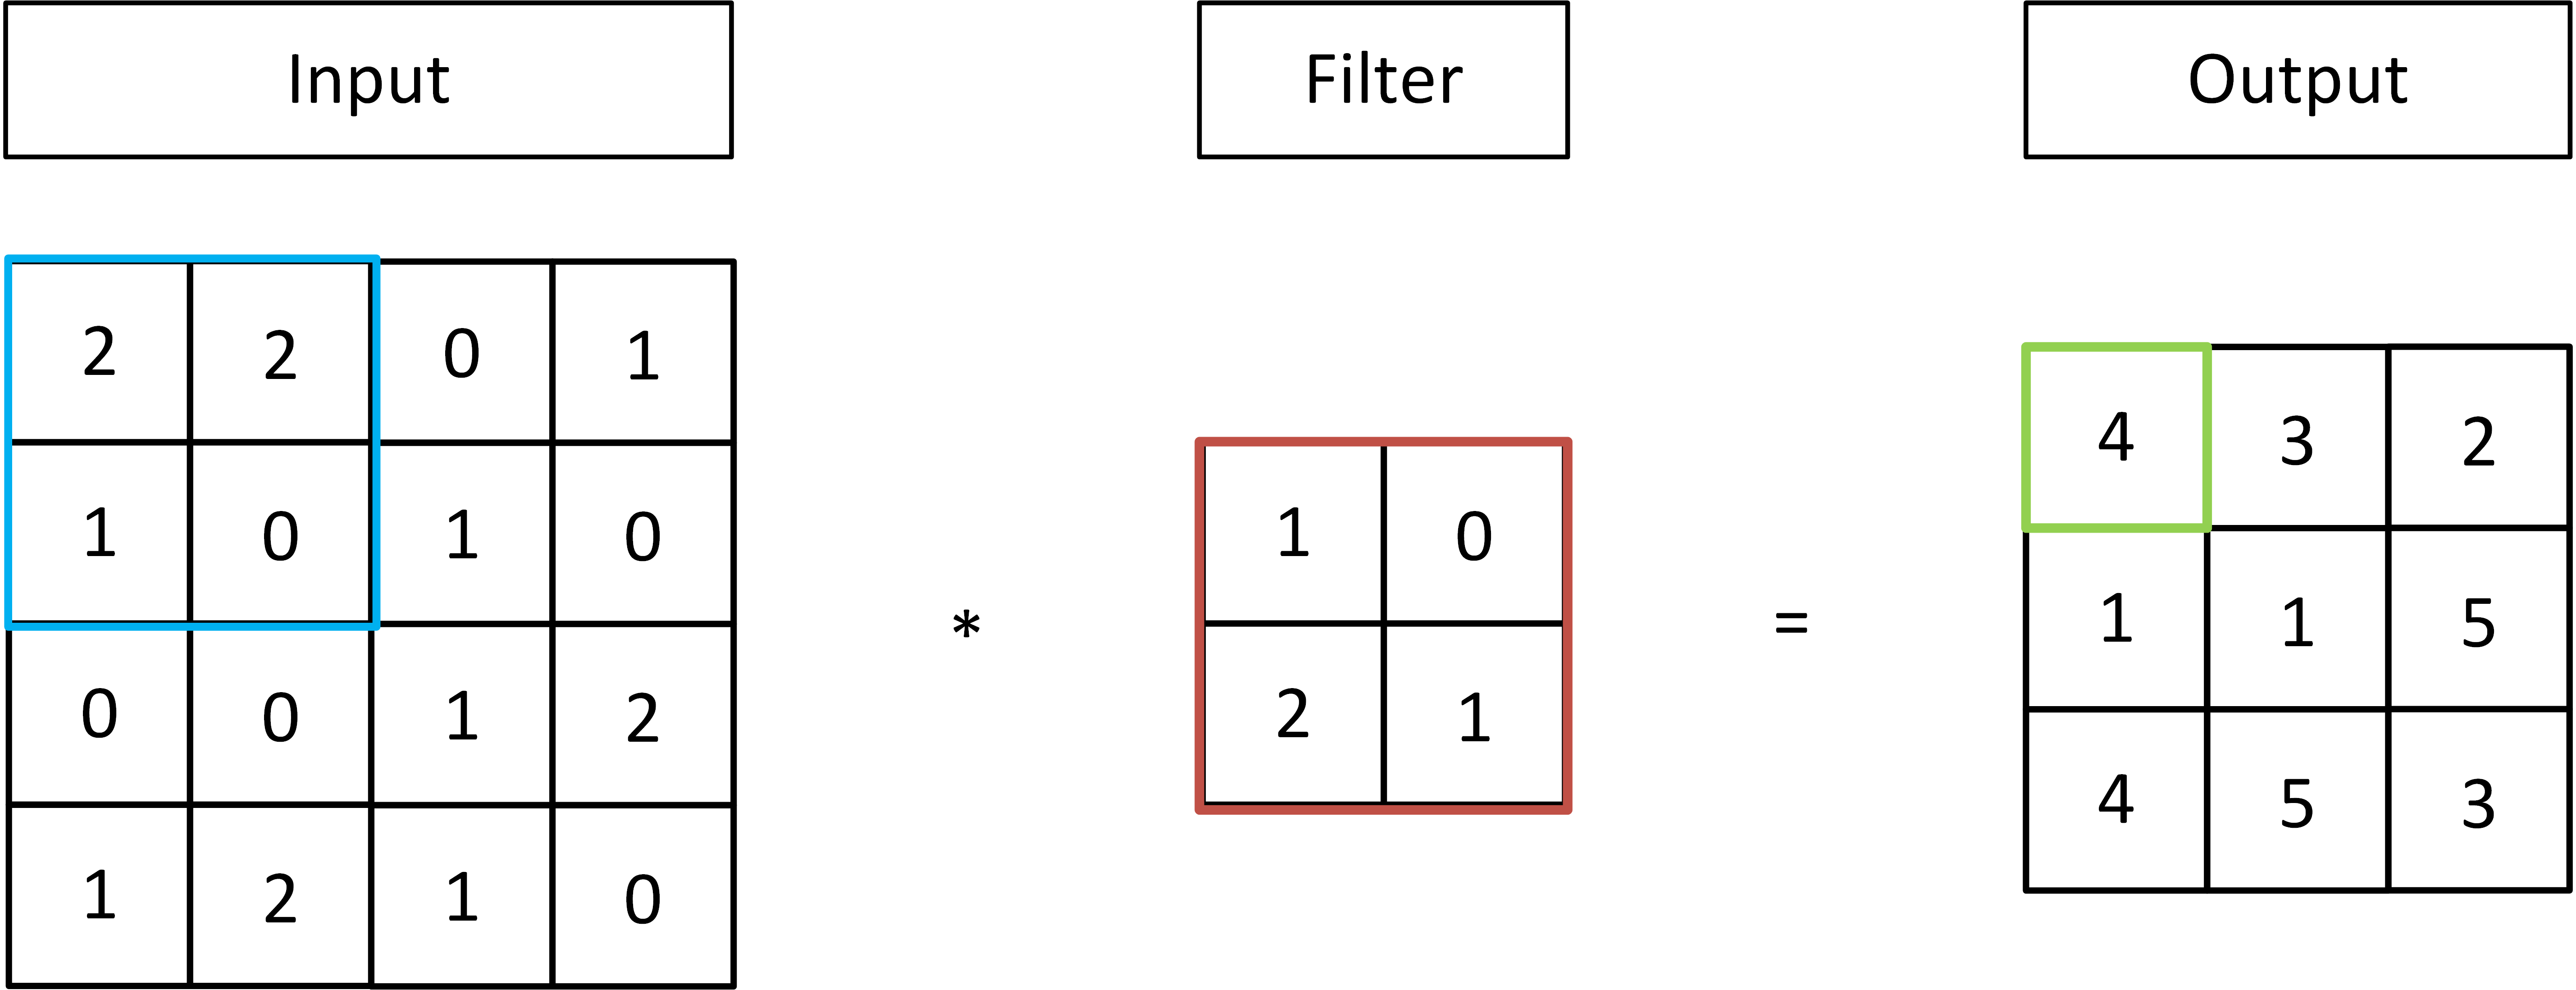
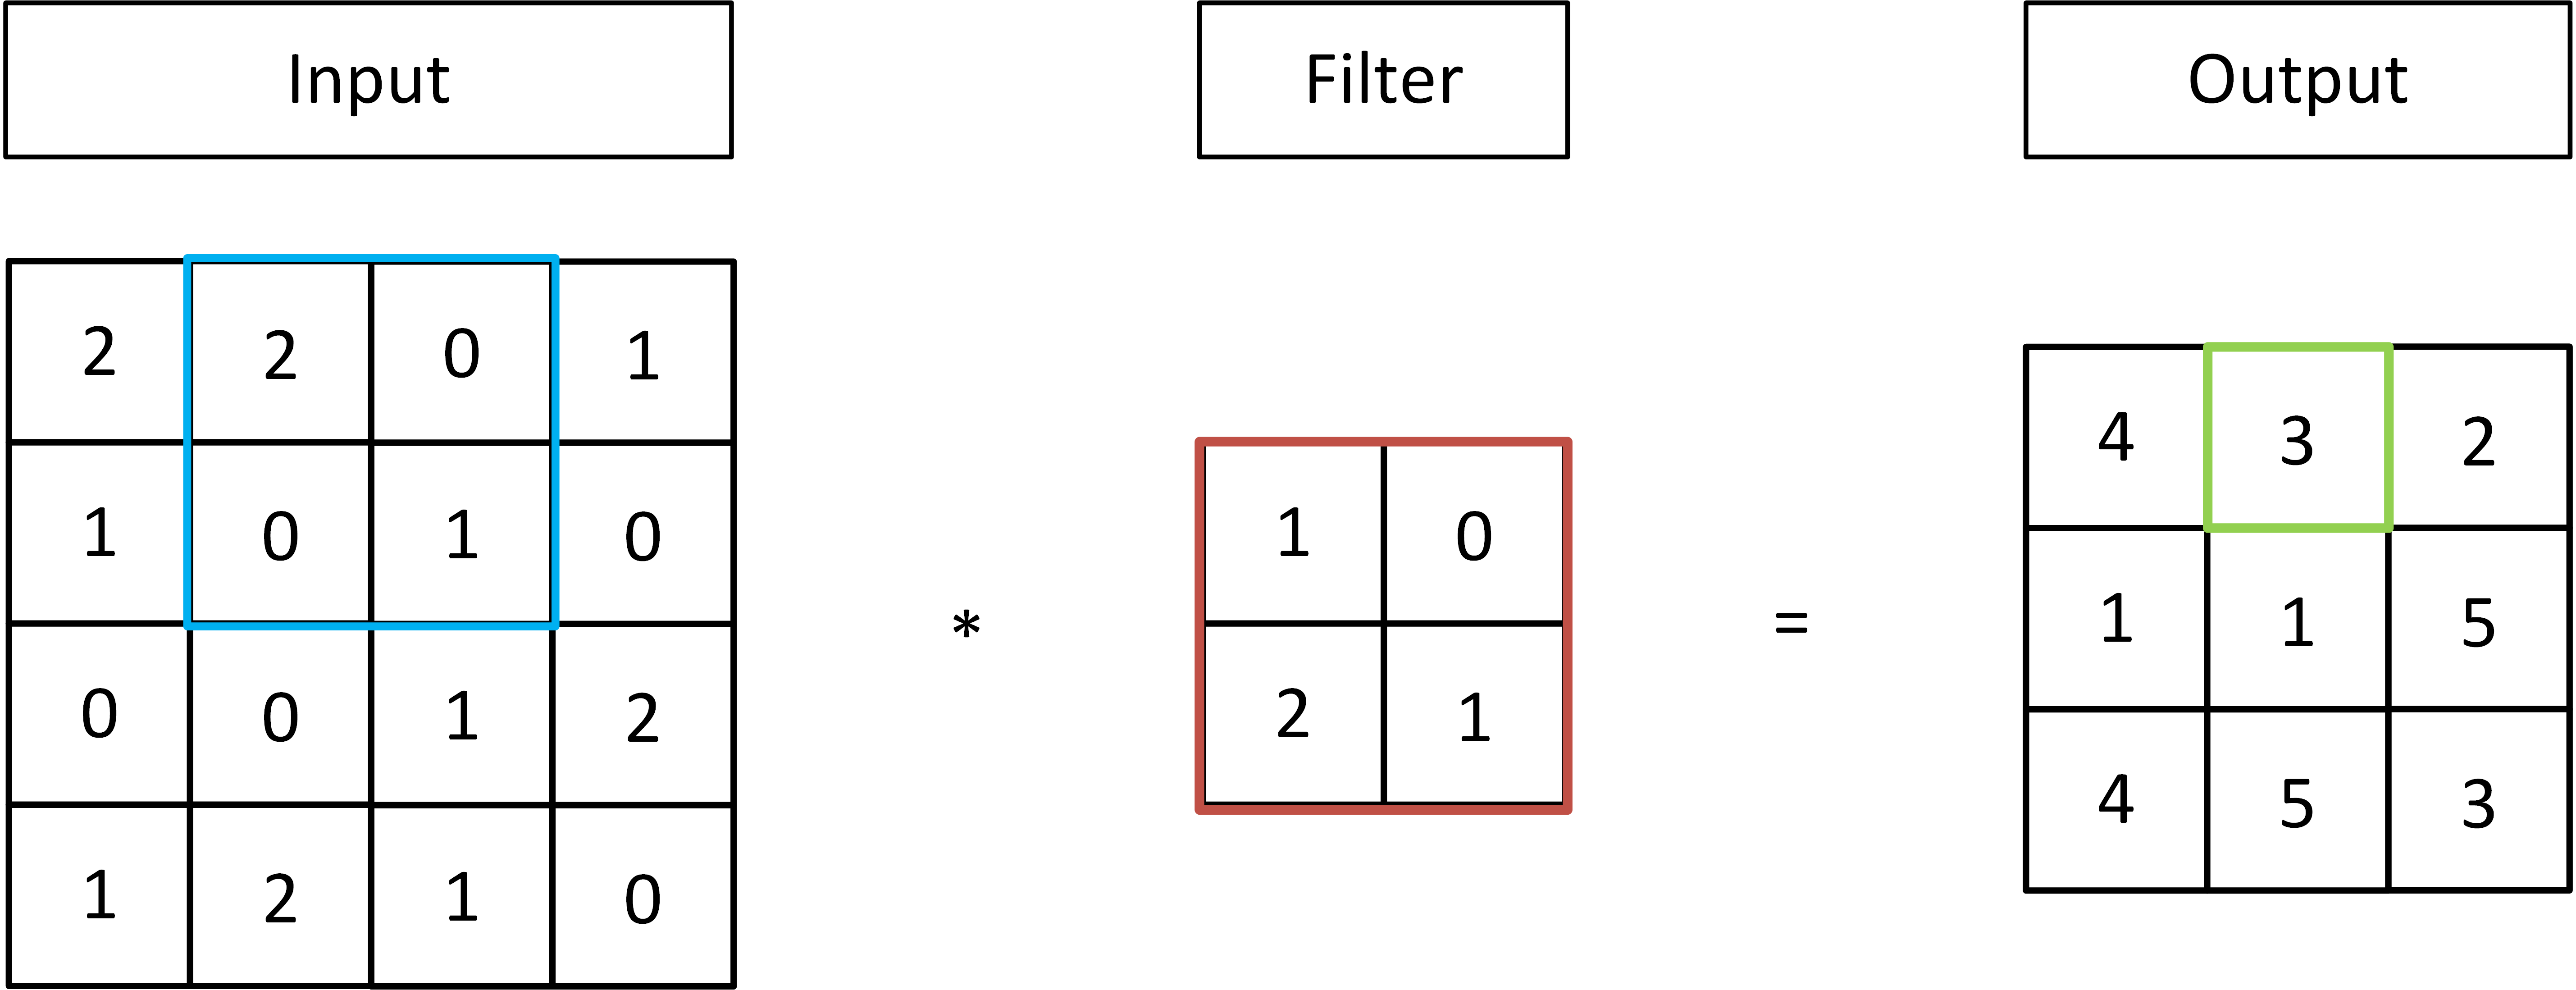<img src="images/Faltung1.png" alt="Drawing" style="width: 600px;"/>
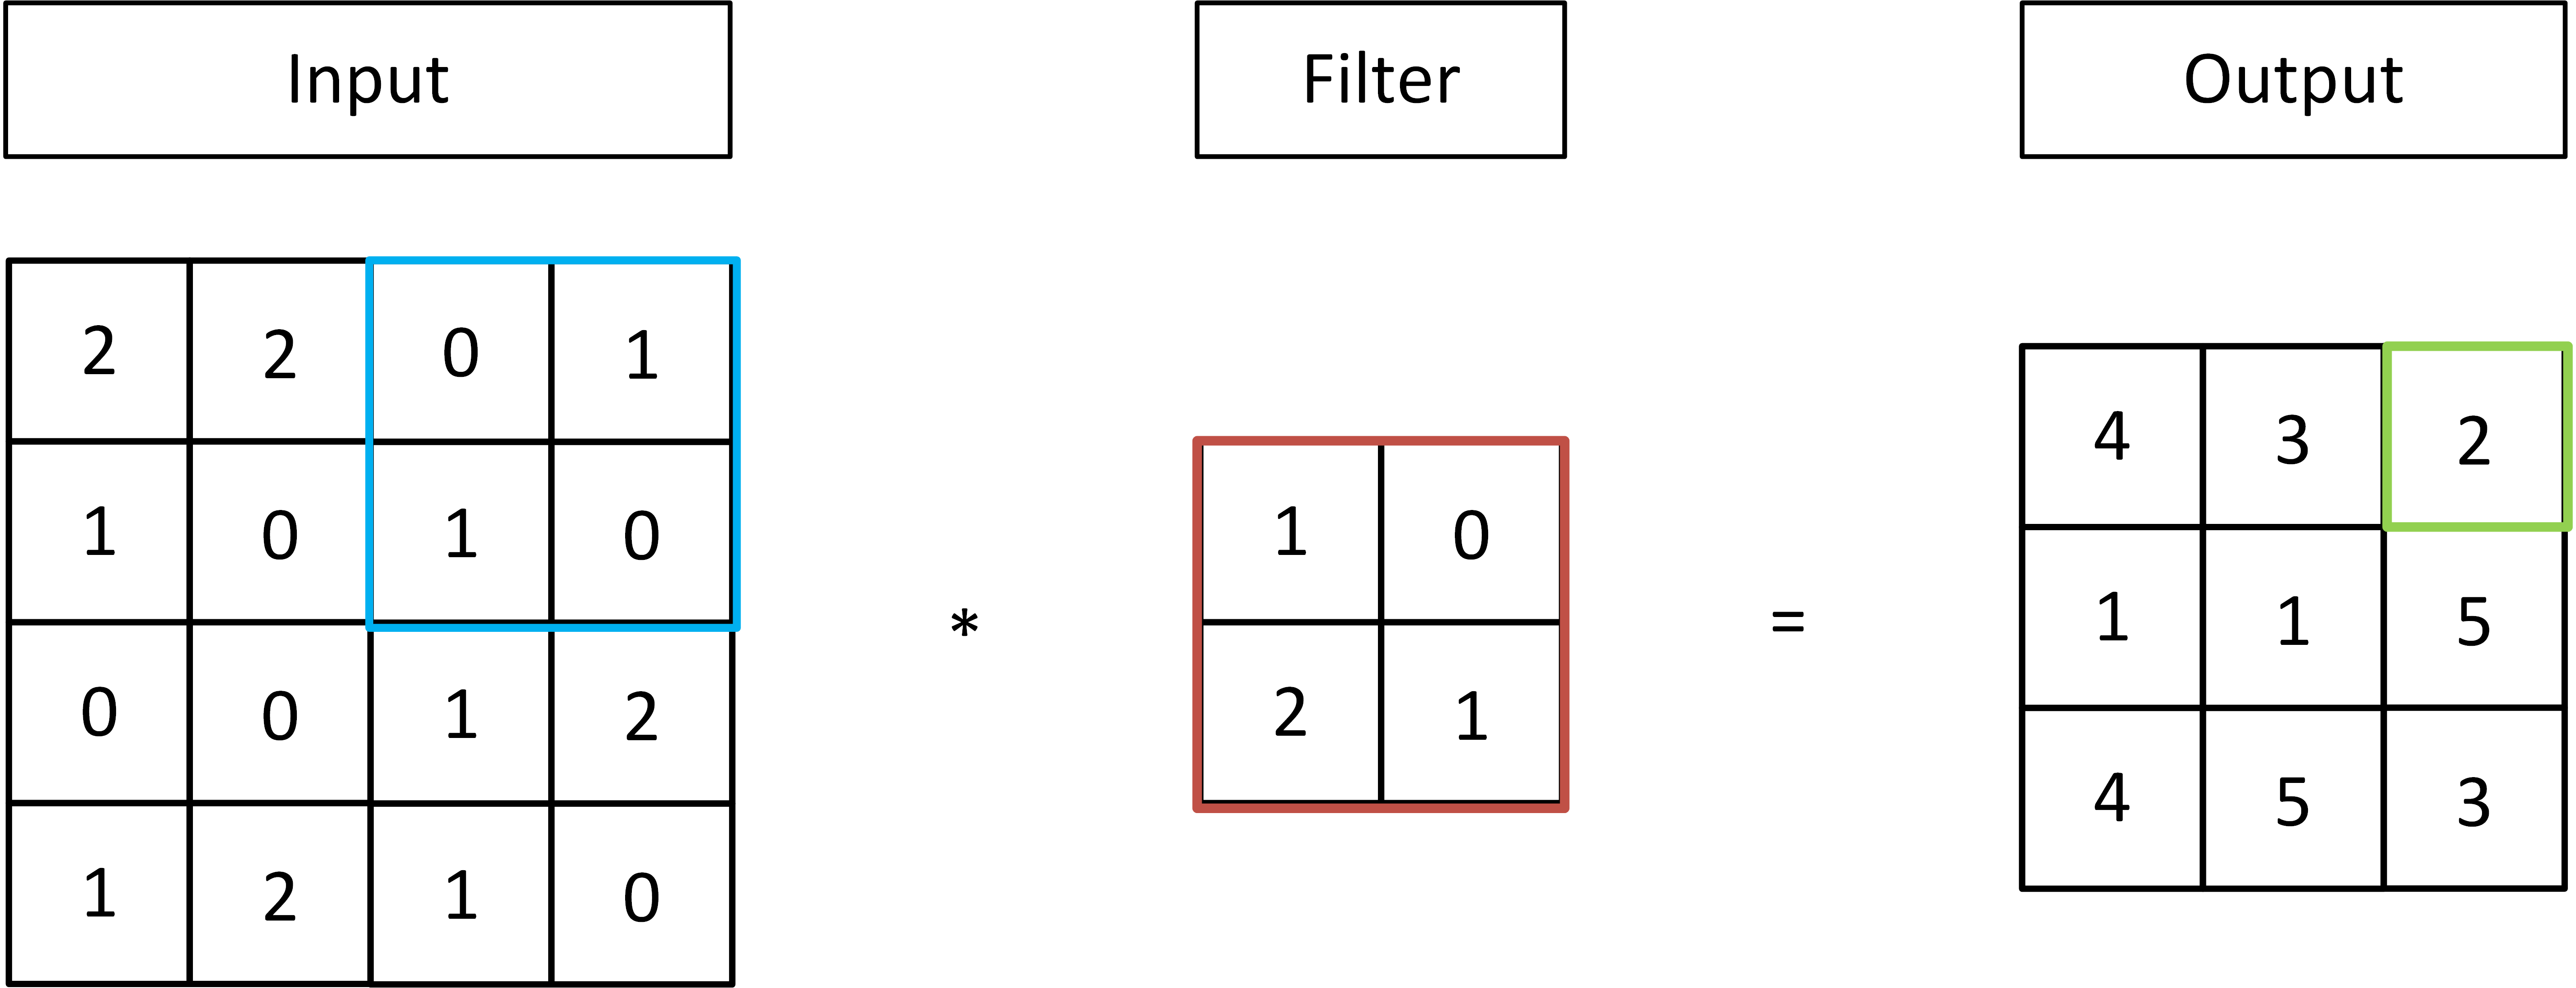
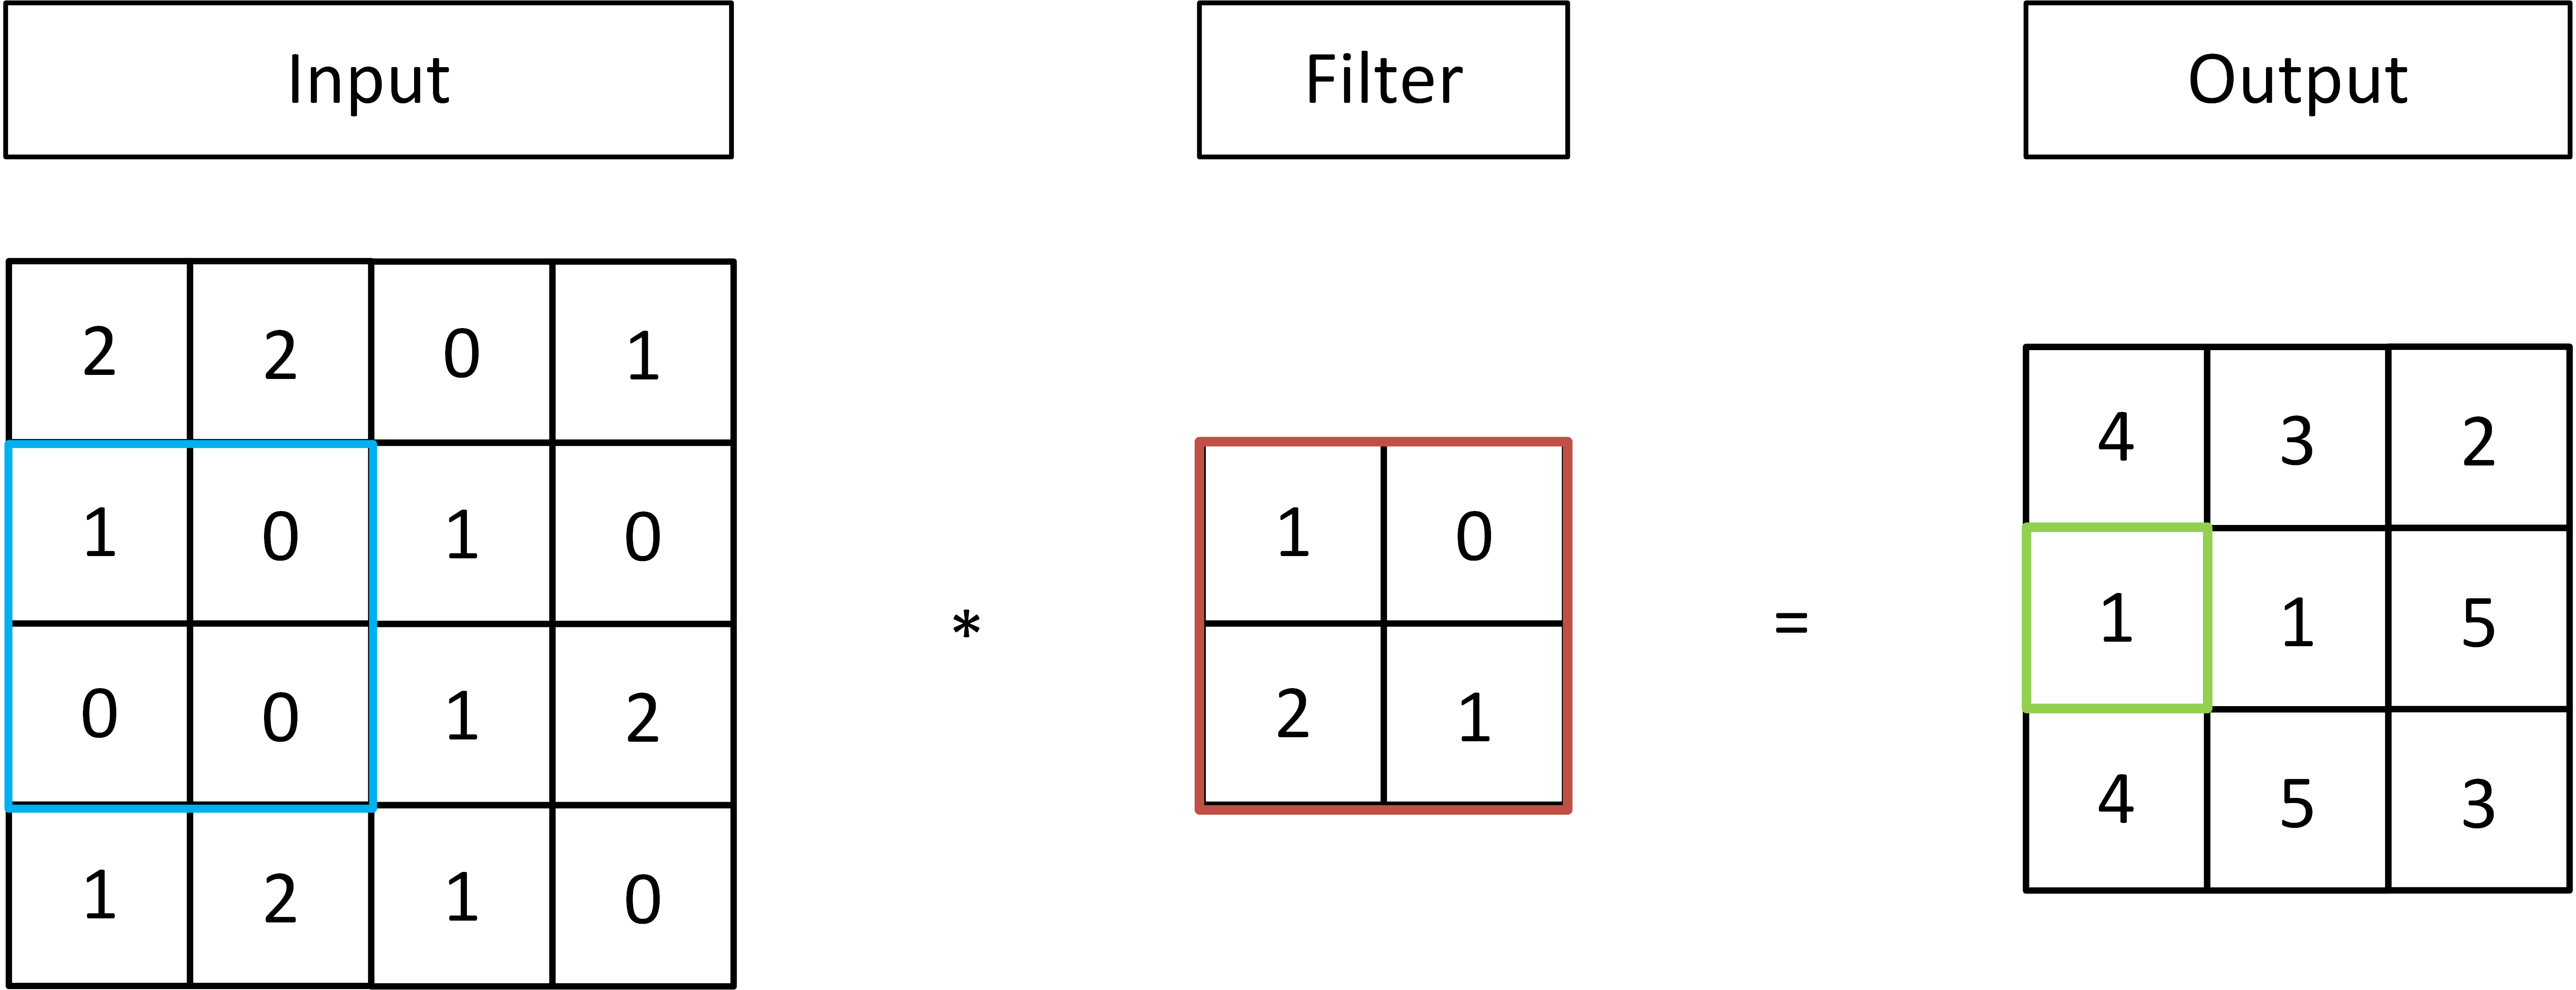


Beachten Sie, dass die Faltungsschicht den Filter nicht spiegelt, wie in der konventionellen Signalverarbeitung. Von nun an werden Bilder oder räumliche Informationen in 3 Dimensionen definiert durch:

 - Height $H$
 - Weight $W$
 - Depth $d$ (channels)

Die diskrete Faltung reduziert die Bilddimensionen wie oben beschrieben. Die folgende Gleichung beschreibt die Reduktion selbst, wobei $K$ die `Kernel`- oder Filterdimensionen, $P$ zusätzliche Werte (meist zur Erhaltung der Ausgangsdimensionen, genannt `Padding`) und $S$ den `Stride` bezeichnet. Es gibt verschiedene Padding-Techniken, z.B. das Hinzufügen von Nullen (Zero Padding). Wenn der Stride größer als 1 ist, überspringt der Kernel bei der Faltung dazwischen liegende Werte.

\begin{align}
W_{i+1} = \dfrac{(W_{i}-K_{x}+2*P_{x})}{S_x}+1 \\
H_{i+1} = \dfrac{(H_{i}-K_{y}+2*P_{y})}{S_y}+1
\end{align}


Zunächst beginnen wir mit einem **grauen Bild** namens ascent, wobei W gleich der Breite des Bildes und H gleich der Höhe des Bildes ist. Da dieses Bild ein Graustufenbild ist, ist die Tiefe $d=1$.

<div class="alert alert-block alert-success">
<b>Aufgabe 5.2.1:</b>
Implementieren Sie die Funktion <code>conv</code> welche ein gegebenes Bild <code>image_data</code> mit einem gegebenenen Filter <code>filter_kern</code> filtert. Nehmen Sie an:

* Das Bild liegt entsprechend dem Beispiel (in der folgenden Zelle) als eine Liste von Listen vor
* Die Tiefe des Bildes ist 1
</div>

In [ ]:
def conv(image_data:list, filter_kern:list)->list:
    # STUDENT CODE HERE

    #STUDENT CODE until HERE

In [ ]:
test_input_data = [[0,0,0,0,0], [0,1,1,1,0], [0,0,2,0,0], [0,3,3,3,0], [0,0,0,0,0], [0,0,0,0,0]]
test_filter = [[0,0], [-1, 1]]
test_result = [[1,0,0,-1],[0,2,-2,0],[3,0,0,-3], [0,0,0,0], [0,0,0,0]]
found = conv(test_input_data, test_filter)
# Die folgende Zeile erzeugt einen Fehler, wenn die Ausgabe der Methode nicht mit der erwarteten übereinstimmt
assert found == test_result

### Filtertypen

Bevor wir nun in Richtung praktische Anwendung gehen, schauen wir uns grundlegende Filter an. Außerdem werden wir uns die Effekte der Filter anschauen - hierzu verwenden wir das folgende Bild:

In [ ]:
def read_image_as_array(image_path:str, new_size: tuple) -> np.array:
    img = Image.open(image_path).convert('L')
    img = img.resize(new_size,Image.ANTIALIAS)
    return np.array(img)

lama = Image.open('images/lama.png').convert('L')
lama = lama.resize((500,500),Image.ANTIALIAS)
plt.figure(figsize=(figure_inches, figure_inches))
plt.imshow(lama, cmap='gray')
data = np.array(lama)

#### Identitätsfilter

Der erste Filter entspricht der Identität, d.h. der Wert eines Pixel wird auf genau diesen abgebildet. Um dies zu erreichen wird ein quadratischer Filterkernel benötigt, dessen Größe ungerade ist. Außerdem ist der mittlere Eintrag 1 und alle anderen 0. Ein $3\times 3$-Filterkernel hat somit die Form:

$\left\lbrack\begin{array}{ccc} 0&0&0\\ 0&1&0\\ 0&0&0\end{array}\right\rbrack$

Und nun die angekündigte Anwendung auf das Bild:

In [ ]:
plt.figure(figsize=(figure_inches, figure_inches))
filter_kern_id = [[0,0,0],[0,1,0],[0,0,0]]
filtered_data = conv(data, filter_kern_id)
plt.imshow(filtered_data, cmap='gray')

#### Eckendetektoren

Die nächsten drei Filter ziehlen darauf ab, Ecken im Bild zu finden. Ziel hierbei ist es flächige Bereiche voneinander zu trennen. Die Filter sind oft nach deren Erfinder bzw. Entdecker benannt. In diesem Fall stellt der Sobel2 eine Verbesserung des Sobel1 dar - dieser kann zusätzlich zum horizontalen sowie vertikalen auch im $45^\circ$ Bereich messen.

Roberts: $\left\lbrack\begin{array}{ccc} 1&0&-1\\ 0&0&0\\ -1&0&1 \end{array}\right\rbrack$

Sobel1: $\left\lbrack\begin{array}{ccc} 0&-1&0\\ -1&4&-1\\ 0&-1&0\end{array}\right\rbrack$

Sobel2: $\left\lbrack\begin{array}{ccc} -1&-1&-1\\-1&8&-1\\ -1&-1&-1\end{array}\right\rbrack$

In [ ]:
filter_kern_roberts = [[1,0,-1], [0,0,0], [-1,0,1]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data_e1 = conv(data, filter_kern_roberts)

plt.imshow(filtered_data_e1, cmap='gray')

In [ ]:
filter_kern_sobel1 = [[0,-1,0], [-1,4,-1], [0,-1,0]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data = conv(data, filter_kern_sobel1)

plt.imshow(filtered_data, cmap='gray')

In [ ]:
filter_kern_sobel2 = [[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data = conv(data, filter_kern_sobel2)

plt.imshow(filtered_data, cmap='gray')

#### Bildschärfen

Der nächste Filter dient, wie der Name bereits vermuten lässt, dazu, dass Konturen im Bild schärfer werden.

$\left\lbrack\begin{array}{ccc} 0&-1&0\\ -1&5&-1\\ 0&-1&0 \end{array}\right\rbrack$

In [ ]:
filter_kern_sharp = [[0,-1,0], [-1,5,-1], [0,-1,0]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data = conv(data, filter_kern_sharp)

plt.imshow(filtered_data, cmap='gray')

#### Blur / Unschärfe

Die letzen beiden Filter dienen dazu, das Bild zu glätten. Der erste Filter wird auch als Box-Linear-Filter bezeichnet und ist verhätlinismäßig relativ simple aufgebaut. Der zweite Filter basiert auf einer Gaußverteilung und wird daher als Gauß-Filter bezeichnet.

Box-Linear-Filter: $\frac{1}{9} \left\lbrack\begin{array}{ccc}1&1&1\\ 1&1&1\\ 1&1&1\end{array}\right\rbrack$

Gauß-Filter: $\frac{1}{16} \left\lbrack\begin{array}{ccc}1&2&1\\ 2&4&2\\ 1&2&1\end{array}\right\rbrack$

In [ ]:
filter_kern_blf = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data = conv(data, filter_kern_blf)

plt.imshow(filtered_data, cmap='gray')

In [ ]:
filter_kern_gauss = [[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]]

plt.figure(figsize=(figure_inches, figure_inches))
data = read_image_as_array('images/lama.png', (500,500))
filtered_data = conv(data, filter_kern_gauss)

plt.imshow(filtered_data, cmap='gray')

### RGB-Bilder

Farbige Bilder können in der Regel durch RGB-Bilder dargestellt werden, wobei $d$ gleich 3 ist und enthält:

- R (rot),
- G (grün),
- B (blau)

Werte für alle Pixel in einem Bild.

In [ ]:
lama = Image.open('images/lama.png')
lama = np.array(lama)

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Lama image 768x1024', fontsize = 15)
ax.imshow(lama, interpolation='nearest')
plt.tight_layout()

In [ ]:
# In general deep learning (and in tensorflow) Conv-layers will
# regard all channels and therefore use "cubic" filter

# The filter used here in the example down below is only using d=1 (two - dimensional) of the
# rgb image (therefore red), you can change [:,:,0] to [:,:,1] (green) and [:,:,2] (blue)!
# Try it! :)

prewitt_x =  np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

lama_x_prew = signal.convolve2d(lama[:,:,0], prewitt_x, boundary='symm', mode='same')
lama_x_prew = np.absolute(lama_x_prew)

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title('Horizontale Ableitung des Lama Bildes', fontsize = 15)
ax.imshow(lama_x_prew, interpolation='nearest', cmap='gray')
plt.tight_layout()

#### Die Faltungsschicht (engl. Convolutional Layer)

featuremaps.png<img src="images/featuremaps.png" alt="Drawing" style="width: 600px;"/>

Eine Faltungsschicht, welche die erste Schicht im Netzwerk sein könnte, ist im Bild oben dargestellt. Ihr Kernel oder Filter mit den Dimensionen $K_x \times K_y \times d$ enthält Gewichte, die während des Trainings aktualisiert werden und auch die Darstellung der Bilder verändern. Eine Aktivierungskarte (engl. activation map) entspricht einer Faltungsoperation mit einem bestimmten Filter und dem zugehörigen Eingangsbild oder den räumlichen Daten der vorherigen Schicht. In den meisten Fällen werden nicht nur ein, sondern mehrere Filter in einer Faltungsschicht gelernt, so dass es mehrere Aktivierungskarten gibt. In diesem speziellen Fall scheint die Ausgabegröße dieser Faltungsschicht im Vergleich zur Eingabegröße größer geworden zu sein. Infolgedessen werden häufig Pooling-Operationen angehängt, um die Daten innerhalb des Netzwerks zu reduzieren. Die nächste Schicht erhält dann wieder räumliche Informationen und verwendet Filter, um die räumlichen Informationen zu extrahieren und zu verändern.


**Idea**: _`Spärliche Verbindungen (engl. Sparse Connections)` (nicht vollständig verbundene Schichten wie bei einem MLP) sind als Kernel für große Datenstrukturen gegeben. Die Anzahl der lernbaren Gewichte sinkt!_

Vergleichen wir eine standardmäßige voll verbundene Schicht (engl. fully connected layer) eines MLP mit einer Faltungsschicht für ein reguläres farbiges Bild der Größe $256\times256\times3$:
- Erstes Hidden Layer in einer voll verbundenen Schicht:
    - Input Neuronen $\rightarrow$ $256*256*3$
    - Beginnen Sie z. B. mit der Hälfte der Neuronen im ersten Hidden Layer $\rightarrow$ $128*256*3$
    - Ergebnisse in Gewichte und Biases $\rightarrow$ $256*256*3*128*256*3 + 128*256*3 = 19.327.451.136$ Parameters

        
- Erste Faltungsschicht in einem faltigen neuronalen Netz: Standard 256 Filter (vernünftige Größe) der Größe $3\times3\times3$
    - Gewichte und Biases $\rightarrow$ $256 * 3 * 3 *3 + 256 = 7.168 $ Parameters
    
Trotzdem brauchen Faltungen mit räumlichen Blöcken wie in der obigen Abbildung noch Zeit, um verarbeitet zu werden.
Lokale Informationen werden nur nicht wie globale Abhängigkeiten in Hidden Layers verwendet!

Die **Vorteile** einer Faltungsschicht (`CONV`) gegenüber einer vollverknüpften Schicht sind die folgenden
 - Weniger Parameter für das Training
 - Nutzung der lokalen Strukturen des Bildes
 - Unabhängig von der Position des Merkmals im Bild

**Nachteile** von Faltungsschichten (`CONV`):
 - Informationen müssen räumliche Abhängigkeiten haben (wie bei einem menschlich erkennbaren Bild)

Beim Stapeln mehrerer Faltungsschichten hat ein Kernel der folgenden Faltungsschicht die Form $K_x \times K_y \times d$, wobei $d$ die Anzahl der Kanäle der vorherigen Schicht ist. Die Anzahl der Kanäle ist gegeben durch die Anzahl der verschiedenen Filter, die in der Faltungsschicht verwendet werden. Definiert man also eine Faltungsschicht mit z. B. $nb\_filters=64$, so legt man die dritte Dimension eines Filters in der nächsten Schicht fest. Denn im zweidimensionalen Fall expandiert der Filter immer auf die vorherige Kanaldimension. Betrachtet man CNNs für die Videoanalyse oder für Zeitreihen, so stößt man auf 3-dimensionale Faltungsschichten, die sich nicht nur in den Bilddimensionen bewegen, sondern in einer dritten Dimension (in diesem Fall: Zeit).

#### Die Poolingsschicht (engl. pooling layer)

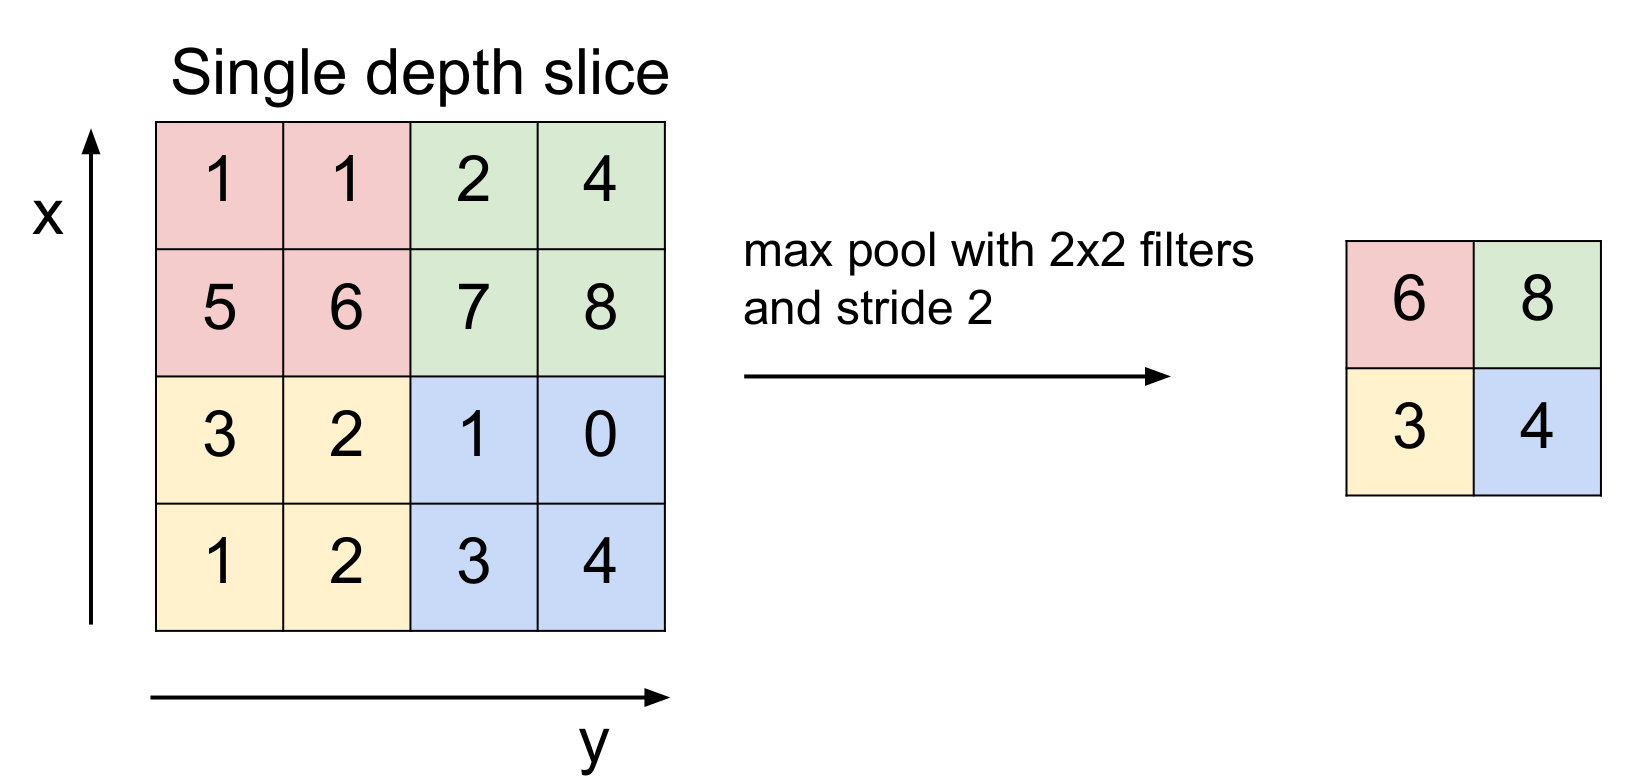


                                     Quelle: http://cs231n.github.io/convolutional-networks/


Die Pooling Schicht ist ein Filter wie alle anderen Filter im neuronalen Faltungsnetzwerk. Allerdings mit der Ausnahme, dass sie ihre Gewichte nicht aktualisiert und eine feste Funktionsoperation durchführt. Die häufigste Pooling-Operation ist das Max-Pooling. Wie der Name schon sagt, wird im Bereich des Kerns nur der Maximalwert weitergegeben. Normalerweise entspricht der Stride den Dimensionen des Kernels. Das Max-Pooling wird nur auf die Höhe und Breite des Bildes angewendet, so dass die Kanaldimensionen nicht betroffen sind. Es wird verwendet, um räumliche Informationen zu reduzieren.

<div class="alert alert-block alert-success">
<b>Aufgabe 5.2.2:</b> Implementieren Sie die Funktion <code>max_pool</code> die Maxpooling durchführt. Gegeben ist wieder ein Grauwertbild <code>image_data</code>, d.h. es besitzt nur einen Kanal und Sie können annehmen, dass das Bilder wieder als eine Liste von Listen übergeben wird. Außerdem ist die Größe des Filters <code>filter_size</code> als Tupel und die <code>stride</code> als <code>int</code> gegeben.
</div>

In [ ]:
def max_pool(image_data:list, filter_size:tuple, stride:int)->list:
    # STUDENT CODE HERE

    # STUDENT CODE until HERE

In [ ]:
test_input_data = [[0,0,0,0,0], [0,1,1,1,0], [0,0,2,0,0], [0,3,3,3,0], [0,0,0,0,0], [0,0,0,0,0]]
test_filter_size = (2,2)
stride = 2
test_result = [[1,1],[3,3], [0,0]]

# The folgende Zeile erzeugt einen Fehler, wenn die Ausgabe der Methode nicht mit der erwarteten übereinstimmt
found = max_pool(test_input_data, test_filter_size, stride)
assert found == test_result

#### ReLU - Schicht oder Aktivierung
Die "RELU"-Schicht oder Aktivierung verwendet eine elementweise Aktivierungsfunktion auf das Raumvolumen an, wie auf jeden Knoten in einer Hidden Layer. Die Funktion kann als $max(0,x)$ angegeben werden und ist unten dargestellt. Betrachten Sie $\sigma(x)$ als die Aktivierungsfunktion.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x:float)->float:
    return np.maximum(0,x)
x = np.linspace(-10, 10, num = 1000)

plt.figure(2, figsize=(10,3.5))
plt.plot(x, relu(x), label='ReLU')
plt.title('The ReLU activation')
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.tight_layout()
plt.grid()

### Zusammenfassung

Die folgende Animation zeigt recht gut, wie ein Faltungsnetzwerk (engl. convolutional network) anhand des `MNIST`-Datensatzes funktioniert.
Nachdem die Faltungsschichten die Repräsentation der Bilder verändert haben, werden die endgültigen mehrdimensionalen Blöcke in ein langes Array gelegt (die Operation wird "Flattening" genannt) und an voll verbundene Schichten eines neuronalen Netzes weitergeleitet.

[MNIST-CLassification](http://scs.ryerson.ca/~aharley/vis/conv/flat.html)

#### Receptive Field

In der Animation bzw. Simulation von MNIST werden Abhängigkeiten, die als Linien zwischen mehr als zwei Schichten dargestellt werden, nicht abgebildet.
Dennoch ist es möglich, Beziehungen zwischen beliebigen Schichten innerhalb des Netzes darzustellen. Dadurch ist es möglich, ein gewisses Wissen oder eine Idee über die Anzahl der Faltungsschichten zu erhalten, die für eine Anwendung oder Aufgabe verwendet werden sollten. Betrachten Sie drei übereinander gestapelte Faltungsschichten wie im Bild unten. Ein Wert in der grünen Schicht bezieht sich auf 9 Eingangswerte. Folglich summiert sich ein Wert in der gelben Schicht auf 9 in der grünen Schicht. Ein Eintrag in der gelben Schicht wird also von mehr Werten beeinflusst als die grünen Aktivierungseinträge in Bezug auf das Eingangsbild. Dieser Bereich ist gelb dargestellt und deckt 49 Werte des Eingangsbildes ab. Um die Dimensionen während der Faltungen wie in üblichen CNNs beizubehalten, wurde ein Padding verwendet, um die Dimensionen der Matrix gleich zu halten. Die `Initialmatrix` ist dann von der Größe $7 \times 7$.

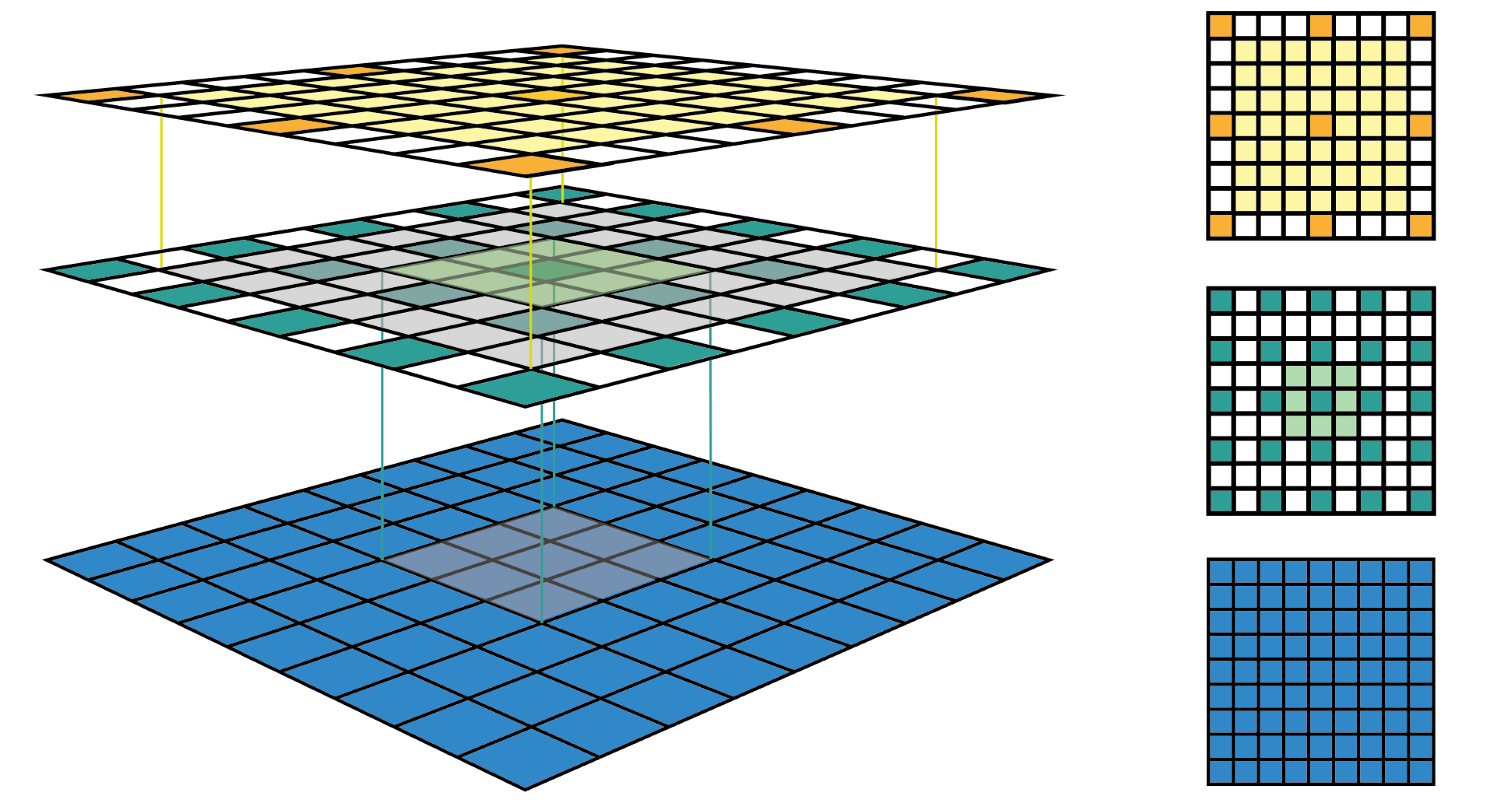

    Quelle:https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807

<div class="alert alert-block alert-success">
<b>Frage 5.2.3:</b> Was ist der Hauptunterschied zwischen einer Faltungsschicht (engl. convolutional layer) und einer vollverknüpften Schicht (engl. fully-connected layer) und warum werden überhaupt Filter verwendet?
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>
